In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv('/kaggle/input/lamost-dr7-spectroscopy-dataset/98017 (copy).csv', sep='|', engine='python')

In [3]:
df.shape

(2662857, 15)

In [4]:
df.head()

,combined_obsid,combined_obsdate,combined_lmjd,combined_mjd,combined_planid,combined_spid,combined_fiberid,combined_class,combined_subclass,combined_z,combined_ra,combined_dec,combined_logg,combined_teff,combined_feh
0,504814065,2016-12-31,57754,57753,GAC110N45M1,14,65,STAR,G3,0.000084,107.83991,45.282139,4.520,5630.92,-0.721
1,504814068,2016-12-31,57754,57753,GAC110N45M1,14,68,STAR,K5,-0.000007,107.92720,45.498493,4.686,4431.67,-0.683
2,504814070,2016-12-31,57754,57753,GAC110N45M1,14,70,STAR,F0,-0.000009,107.85650,45.437579,4.187,6638.88,-0.585
3,504814073,2016-12-31,57754,57753,GAC110N45M1,14,73,STAR,K7,0.000020,107.77542,45.438729,4.713,4228.44,-0.277
4,504814077,2016-12-31,57754,57753,GAC110N45M1,14,77,STAR,K5,0.000038,108.60284,46.124812,4.701,4265.74,-0.137


In [5]:
df.describe()

,combined_obsid,combined_lmjd,combined_mjd,combined_spid,combined_fiberid,combined_z,combined_ra,combined_dec,combined_logg,combined_teff,combined_feh
count,2.662857e+06,2.662857e+06,2.662857e+06,2.662857e+06,2.662857e+06,2.662857e+06,2.662857e+06,2.662857e+06,2.097068e+06,2.097068e+06,1.799782e+06
mean,3.660842e+08,5.720678e+04,5.720578e+04,8.468582e+00,1.253786e+02,-1.434429e+00,1.405020e+02,2.594959e+01,-2.813109e+01,5.219706e+03,-2.508639e-01
std,2.786442e+08,9.978596e+02,9.978596e+02,4.577805e+00,7.117409e+01,1.197521e+02,8.186309e+01,1.626256e+01,5.670664e+02,1.283592e+03,3.557488e-01
min,1.010010e+05,5.585900e+04,5.585800e+04,1.000000e+00,1.000000e+00,-9.999000e+03,1.100000e-04,-9.666898e+00,-9.999000e+03,-9.999000e+03,-2.500000e+00
25%,7.810312e+07,5.624600e+04,5.624500e+04,5.000000e+00,6.400000e+01,-1.054063e-04,8.139939e+01,1.419258e+01,3.972000e+00,4.635718e+03,-4.300000e-01
50%,5.105062e+08,5.776000e+04,5.775900e+04,8.000000e+00,1.250000e+02,-2.011390e-05,1.244112e+02,2.652370e+01,4.260000e+00,5.372180e+03,-2.070000e-01
75%,6.276022e+08,5.812400e+04,5.812300e+04,1.200000e+01,1.860000e+02,6.635000e-05,1.965190e+02,3.678648e+01,4.599000e+00,5.908843e+03,-1.500000e-02
max,7.469152e+08,5.864300e+04,5.864200e+04,1.600000e+01,2.500000e+02,1.310000e+00,3.599999e+02,8.311561e+01,6.000000e+00,8.499850e+03,9.890000e-01


In [6]:
df.columns

Index(['combined_obsid', 'combined_obsdate', 'combined_lmjd', 'combined_mjd',
       'combined_planid', 'combined_spid', 'combined_fiberid',
       'combined_class', 'combined_subclass', 'combined_z', 'combined_ra',
       'combined_dec', 'combined_logg', 'combined_teff', 'combined_feh'],
      dtype='object')

In [7]:
df = df.drop_duplicates()

In [8]:
df.isna().sum()

combined_obsid            0
combined_obsdate          0
combined_lmjd             0
combined_mjd              0
combined_planid           0
combined_spid             0
combined_fiberid          0
combined_class            0
combined_subclass         0
combined_z                0
combined_ra               0
combined_dec              0
combined_logg        565789
combined_teff        565789
combined_feh         863075
dtype: int64

In [9]:
df = df.dropna(subset=['combined_subclass','combined_teff', 'combined_logg', 'combined_feh'])

In [10]:
df.shape

(1799782, 15)

In [11]:
df['combined_class'].unique()

array(['STAR'], dtype=object)

In [12]:
df['combined_subclass'].unique()

array(['G3', 'K5', 'F0', 'K7', 'G7', 'K0', 'K3', 'K4', 'F7', 'F5', 'F6',
       'F3', 'F2', 'F9', 'K1', 'G1', 'G8', 'G0', 'G2', 'G6', 'F8', 'G9',
       'G4', 'G5', 'F4', 'K2', 'A7V', 'A3IV', 'A6IV', 'A6V', 'A7IV',
       'A2V', 'A5V', 'A8III', 'A7III', 'A2IV', 'A1IV', 'A9V', 'A1V',
       'A3V', 'A0III'], dtype=object)

In [13]:
df['spectral_class'] = df['combined_subclass'].str[0]

In [14]:
df['spectral_class'].unique()

array(['G', 'K', 'F', 'A'], dtype=object)

In [15]:
df = df[
    df['combined_subclass'].notna() &
    (df['combined_z'].abs() < 0.001)
]

In [16]:
valid_classes = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

df_clean = df[df['spectral_class'].isin(valid_classes)].copy()


In [17]:
df_clean['spectral_class'].unique()


array(['G', 'K', 'F', 'A'], dtype=object)

In [18]:
df[df['combined_subclass'].str.startswith('M', na=False)].shape

(0, 16)

In [19]:
df_clean.groupby('spectral_class')['combined_teff'].describe()

,count,mean,std,min,25%,50%,75%,max
spectral_class,,,,,,,,
A,29236.0,7707.140053,446.652783,6419.00,7369.455,7746.89,8071.88,8499.85
F,526579.0,6226.923524,480.104968,4181.74,5962.225,6221.72,6495.94,8490.15
G,909695.0,5378.281561,437.491171,3754.12,5043.175,5447.43,5736.57,7167.71
K,332203.0,4595.153499,395.354850,3655.41,4298.910,4600.11,4887.93,7120.20


In [20]:
df_clean = df_clean.dropna(subset=['spectral_class'])

In [21]:
df_clean['spectral_class'].unique()

array(['G', 'K', 'F', 'A'], dtype=object)

In [22]:
spectral_order = {
    'O': 0,
    'B': 1,
    'A': 2,
    'F': 3,
    'G': 4,
    'K': 5,
    'M': 6
}

df_clean['spectral_label'] = df_clean['spectral_class'].map(spectral_order)

In [23]:
df_clean

,combined_obsid,combined_obsdate,combined_lmjd,combined_mjd,combined_planid,combined_spid,combined_fiberid,combined_class,combined_subclass,combined_z,combined_ra,combined_dec,combined_logg,combined_teff,combined_feh,spectral_class,spectral_label
0,504814065,2016-12-31,57754,57753,GAC110N45M1,14,65,STAR,G3,0.000084,107.839910,45.282139,4.520,5630.92,-0.721,G,4
1,504814068,2016-12-31,57754,57753,GAC110N45M1,14,68,STAR,K5,-0.000007,107.927200,45.498493,4.686,4431.67,-0.683,K,5
2,504814070,2016-12-31,57754,57753,GAC110N45M1,14,70,STAR,F0,-0.000009,107.856500,45.437579,4.187,6638.88,-0.585,F,3
3,504814073,2016-12-31,57754,57753,GAC110N45M1,14,73,STAR,K7,0.000020,107.775420,45.438729,4.713,4228.44,-0.277,K,5
4,504814077,2016-12-31,57754,57753,GAC110N45M1,14,77,STAR,K5,0.000038,108.602840,46.124812,4.701,4265.74,-0.137,K,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662851,119710210,2013-02-09,56333,56332,VB065N18V1,10,210,STAR,K1,-0.000072,63.704828,17.758751,4.640,5292.44,0.213,K,5
2662852,119710214,2013-02-09,56333,56332,VB065N18V1,10,214,STAR,G5,0.000185,63.939703,17.751385,2.608,4925.31,-0.734,G,4
2662853,119710216,2013-02-09,56333,56332,VB065N18V1,10,216,STAR,F7,-0.000002,64.048204,17.698419,3.499,5923.40,-0.214,F,3
2662854,119710217,2013-02-09,56333,56332,VB065N18V1,10,217,STAR,F5,0.000020,63.849130,17.956034,4.021,6634.58,0.070,F,3


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


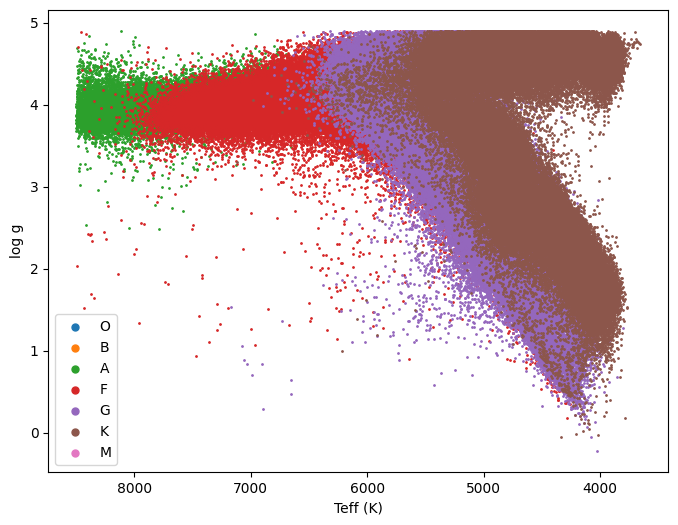

In [24]:
plt.figure(figsize=(8,6))
for cls in ['O','B','A','F','G','K','M']:
    subset = df_clean[df_clean['spectral_class'] == cls]
    plt.scatter(
        subset['combined_teff'],
        subset['combined_logg'],
        s=1,
        label=cls
    )

plt.gca().invert_xaxis()   # hot → cool
plt.xlabel('Teff (K)')
plt.ylabel('log g')
plt.legend(markerscale=5)
plt.show()

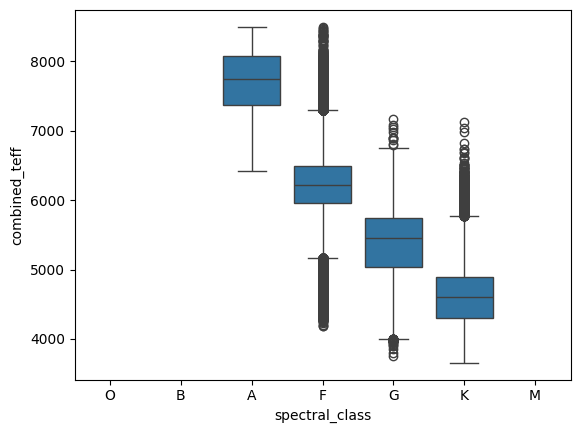

In [25]:
sns.boxplot(
    x='spectral_class',
    y='combined_teff',
    data=df_clean,
    order=['O','B','A','F','G','K','M']
)
plt.show()

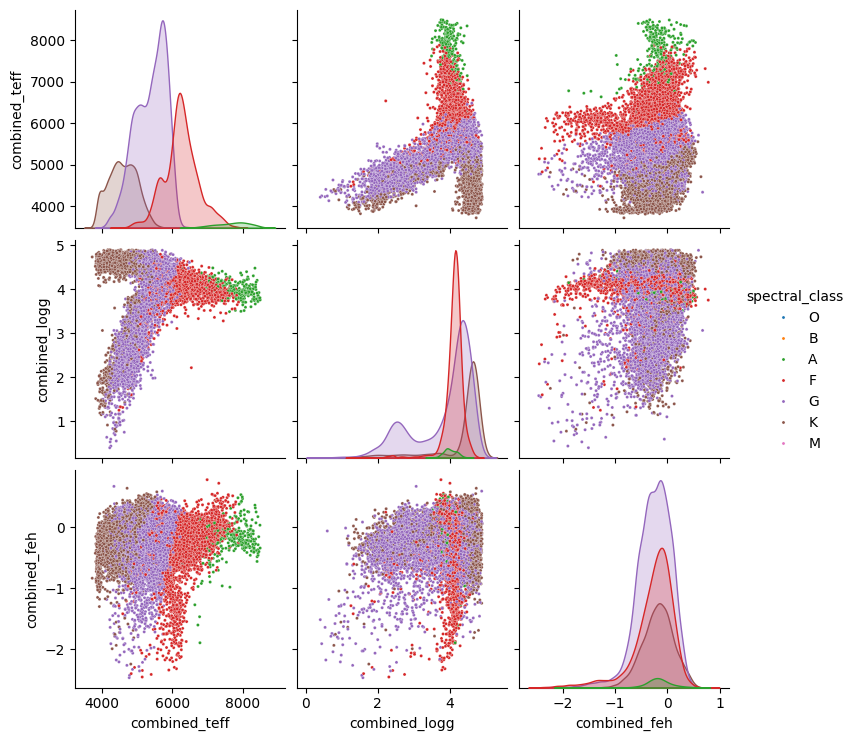

In [26]:
features = ['combined_teff', 'combined_logg', 'combined_feh']
sns.pairplot(
    df_clean.sample(20000),
    vars=features,
    hue='spectral_class',
    hue_order=['O','B','A','F','G','K','M'],
    plot_kws={'s':5}
)
plt.show()


In [33]:
le = LabelEncoder()

df['spectral_label'] = le.fit_transform(df['spectral_class'])

In [34]:
features = ['combined_teff', 'combined_logg', 'combined_feh']

X = df[features].values.astype("float32")
y = df['spectral_label'].values.astype("int32")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


# Scale (VERY important for GNB)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print("Gaussian NB accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Gaussian NB accuracy: 0.7533813758020599
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      5847
           1       0.65      0.82      0.72    105316
           2       0.78      0.74      0.76    181939
           3       0.97      0.68      0.80     66441

    accuracy                           0.75    359543
   macro avg       0.77      0.75      0.75    359543
weighted avg       0.77      0.75      0.76    359543

